In [124]:
#!pip install nasdaq-data-link
import nasdaqdatalink
nasdaqdatalink.ApiConfig.api_key = '5BwoEH6x8VTcx9HS8hca'
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import pandas as pd 
from sklearn import tree
from sklearn.metrics import ConfusionMatrixDisplay
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

In [125]:
ticker = ['AAPL','AXP','BA','CAT','CSCO','CVX','DD','DIS','GE','GS','HD','IBM','INTC','JNJ','JPM','KO','MCD','MMM','MRK','MSFT','NKE','PFE','PG','TRV','UNH','UTX','V','VZ','WMT','XOM']
for x in ticker:
    x = nasdaqdatalink.get_table('SHARADAR/SEP', ticker=[x])

In [126]:
 AAPL = nasdaqdatalink.get_table('SHARADAR/SEP', ticker=['AAPL'])
# AAPL = pd.read_csv('WIKI-AAPL.csv')
AAPL

,ticker,date,open,high,low,close,volume,closeadj,closeunadj,lastupdated
None,,,,,,,,,,
0,AAPL,2018-12-31,39.633,39.840,39.120,39.435,140013864.0,37.801,157.74,2024-02-09
1,AAPL,2018-12-28,39.375,39.630,38.638,39.057,169165696.0,37.439,156.23,2024-02-09
2,AAPL,2018-12-27,38.960,39.193,37.517,39.038,212468260.0,37.420,156.15,2024-02-09
3,AAPL,2018-12-26,37.075,39.307,36.680,39.292,234330176.0,37.664,157.17,2024-02-09
4,AAPL,2018-12-24,37.038,37.888,36.648,36.708,148676928.0,35.186,146.83,2024-02-09
...,...,...,...,...,...,...,...,...,...,...
77,AAPL,2018-09-10,55.237,55.462,54.117,54.583,158065812.0,52.138,218.33,2024-02-09
78,AAPL,2018-09-07,55.462,56.343,55.178,55.325,150479240.0,52.847,221.30,2024-02-09
79,AAPL,2018-09-06,56.557,56.837,55.325,55.775,137159904.0,53.277,223.10,2024-02-09


In [127]:
def up_or_down(row):
    if row['open'] < row['close']:
        val = 1
    else:
        val = 0
    return val
def percentgain(row):
    val = ((row['open']-row['close'])/row['close'])*100
    return val
AAPL['increased'] = AAPL.apply(up_or_down, axis = 1)
#AAPL['percentgain'] = AAPL.apply(percentgain,axis =1)

In [128]:
AAPL

,ticker,date,open,high,low,close,volume,closeadj,closeunadj,lastupdated,increased
None,,,,,,,,,,,
0,AAPL,2018-12-31,39.633,39.840,39.120,39.435,140013864.0,37.801,157.74,2024-02-09,0
1,AAPL,2018-12-28,39.375,39.630,38.638,39.057,169165696.0,37.439,156.23,2024-02-09,0
2,AAPL,2018-12-27,38.960,39.193,37.517,39.038,212468260.0,37.420,156.15,2024-02-09,1
3,AAPL,2018-12-26,37.075,39.307,36.680,39.292,234330176.0,37.664,157.17,2024-02-09,1
4,AAPL,2018-12-24,37.038,37.888,36.648,36.708,148676928.0,35.186,146.83,2024-02-09,0
...,...,...,...,...,...,...,...,...,...,...,...
77,AAPL,2018-09-10,55.237,55.462,54.117,54.583,158065812.0,52.138,218.33,2024-02-09,0
78,AAPL,2018-09-07,55.462,56.343,55.178,55.325,150479240.0,52.847,221.30,2024-02-09,0
79,AAPL,2018-09-06,56.557,56.837,55.325,55.775,137159904.0,53.277,223.10,2024-02-09,0


<Axes: >

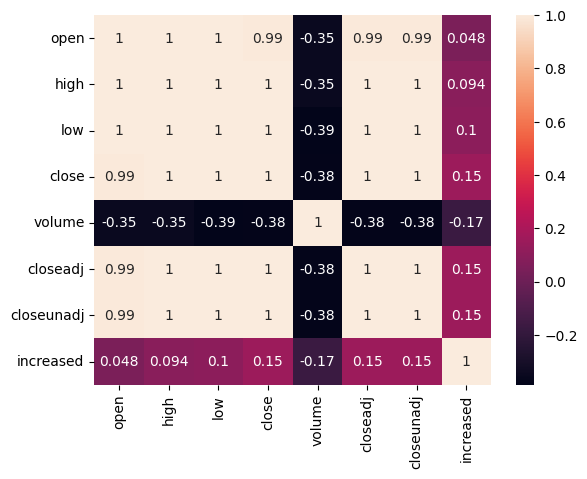

In [129]:
 AAPLCORR = AAPL.drop('ticker',axis =1)
AAPLCORR = AAPLCORR.drop('date',axis = 1)
 AAPLCORR = AAPLCORR.drop('lastupdated',axis = 1)
sns.heatmap(AAPLCORR.corr(), annot = True)

In [130]:
X = AAPLCORR.drop('increased',axis = 1)
y = AAPL['increased']
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=32,stratify = y)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)

y_predict = knn.predict(X_test)
print(knn.score(X_test, y_test))

0.6


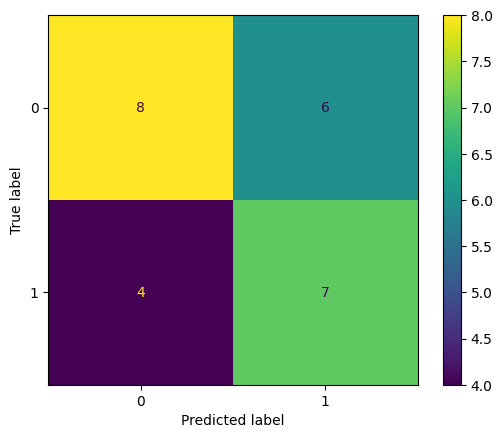

In [131]:
ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test)

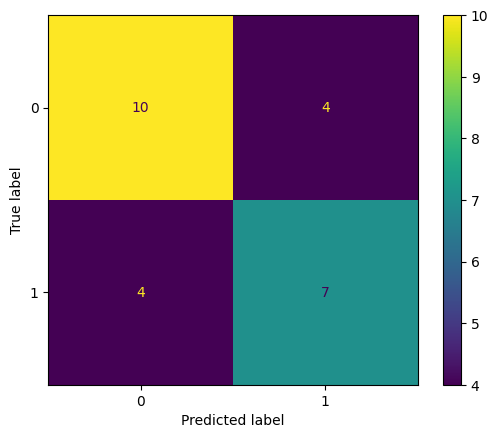

In [132]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)
ConfusionMatrixDisplay.from_estimator(xgb, X_test, y_test)

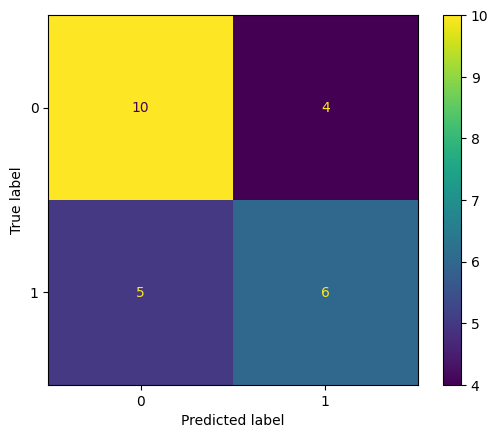

In [134]:
rf = RandomForestClassifier(n_estimators=100, random_state=32)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test)